In [1]:
# import matplotlib.pyplot as plt
# import geopandas

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
from shapely.ops import split
from shapely.affinity import translate
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
from cartopy.io import shapereader



/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
def shift_geom(shift, gdataframe, plotQ=False):
    # this code is adapted from answer found in SO
    # will be credited here: ???
    shift -= 180
    moved_geom = []
    splitted_geom = []
    border = LineString([(shift,90),(shift,-90)])

    for row in gdataframe["geometry"]:
        splitted_geom.append(split(row, border))
    for element in splitted_geom:
        items = list(element)
        for item in items:
            minx, miny, maxx, maxy = item.bounds
            if minx >= shift:
                moved_geom.append(translate(item, xoff=-180-shift))
            else:
                moved_geom.append(translate(item, xoff=180-shift))

    # got `moved_geom` as the moved geometry            
    moved_geom_gdf = gpd.GeoDataFrame({"geometry": moved_geom})

    # can change crs here
    if plotQ:
        fig1, ax1 = plt.subplots(figsize=[8,6])
        moved_geom_gdf.plot(ax=ax1)
        plt.show()

    return moved_geom_gdf

In [3]:
def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    # nami = world[world.name == country_name]
    nami = world[world.NAME == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2,linewidth=1))

          featurecla  scalerank  LABELRANK   SOVEREIGNT SOV_A3  ADM0_DIF  \
0    Admin-0 country          1          3     Zimbabwe    ZWE         0   
1    Admin-0 country          1          3       Zambia    ZMB         0   
2    Admin-0 country          1          3        Yemen    YEM         0   
3    Admin-0 country          3          2      Vietnam    VNM         0   
4    Admin-0 country          5          3    Venezuela    VEN         0   
..               ...        ...        ...          ...    ...       ...   
237  Admin-0 country          1          3  Afghanistan    AFG         0   
238  Admin-0 country          1          5      Kashmir    KAS         0   
239  Admin-0 country          3          4   Antarctica    ATA         0   
240  Admin-0 country          3          6  Netherlands    NL1         1   
241  Admin-0 country          5          6       Tuvalu    TUV         0   

     LEVEL               TYPE   TLC            ADMIN  ...     FCLASS_TR  \
0        2  

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/geopandas/geodataframe.py:2197: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  self, right, how=how, keep_geom_type=keep_geom_type, make_valid=make_valid


Australia
Brunei
Cook Is.
Fr. Polynesia
Guam
Macao
Nauru
New Caledonia
New Zealand
N. Mariana Is.
Japan
Palau
Pitcairn Is.
South Korea
Singapore
Fiji
Kiribati
Marshall Is.
Micronesia
Niue
Papua New Guinea
Solomon Is.
Samoa
Tuvalu
Vanuatu
Wallis and Futuna Is.
Cambodia
Laos
Mongolia
Philippines
Vietnam
China
Malaysia
Hong Kong
American Samoa
Tonga


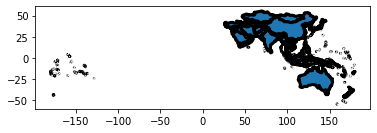

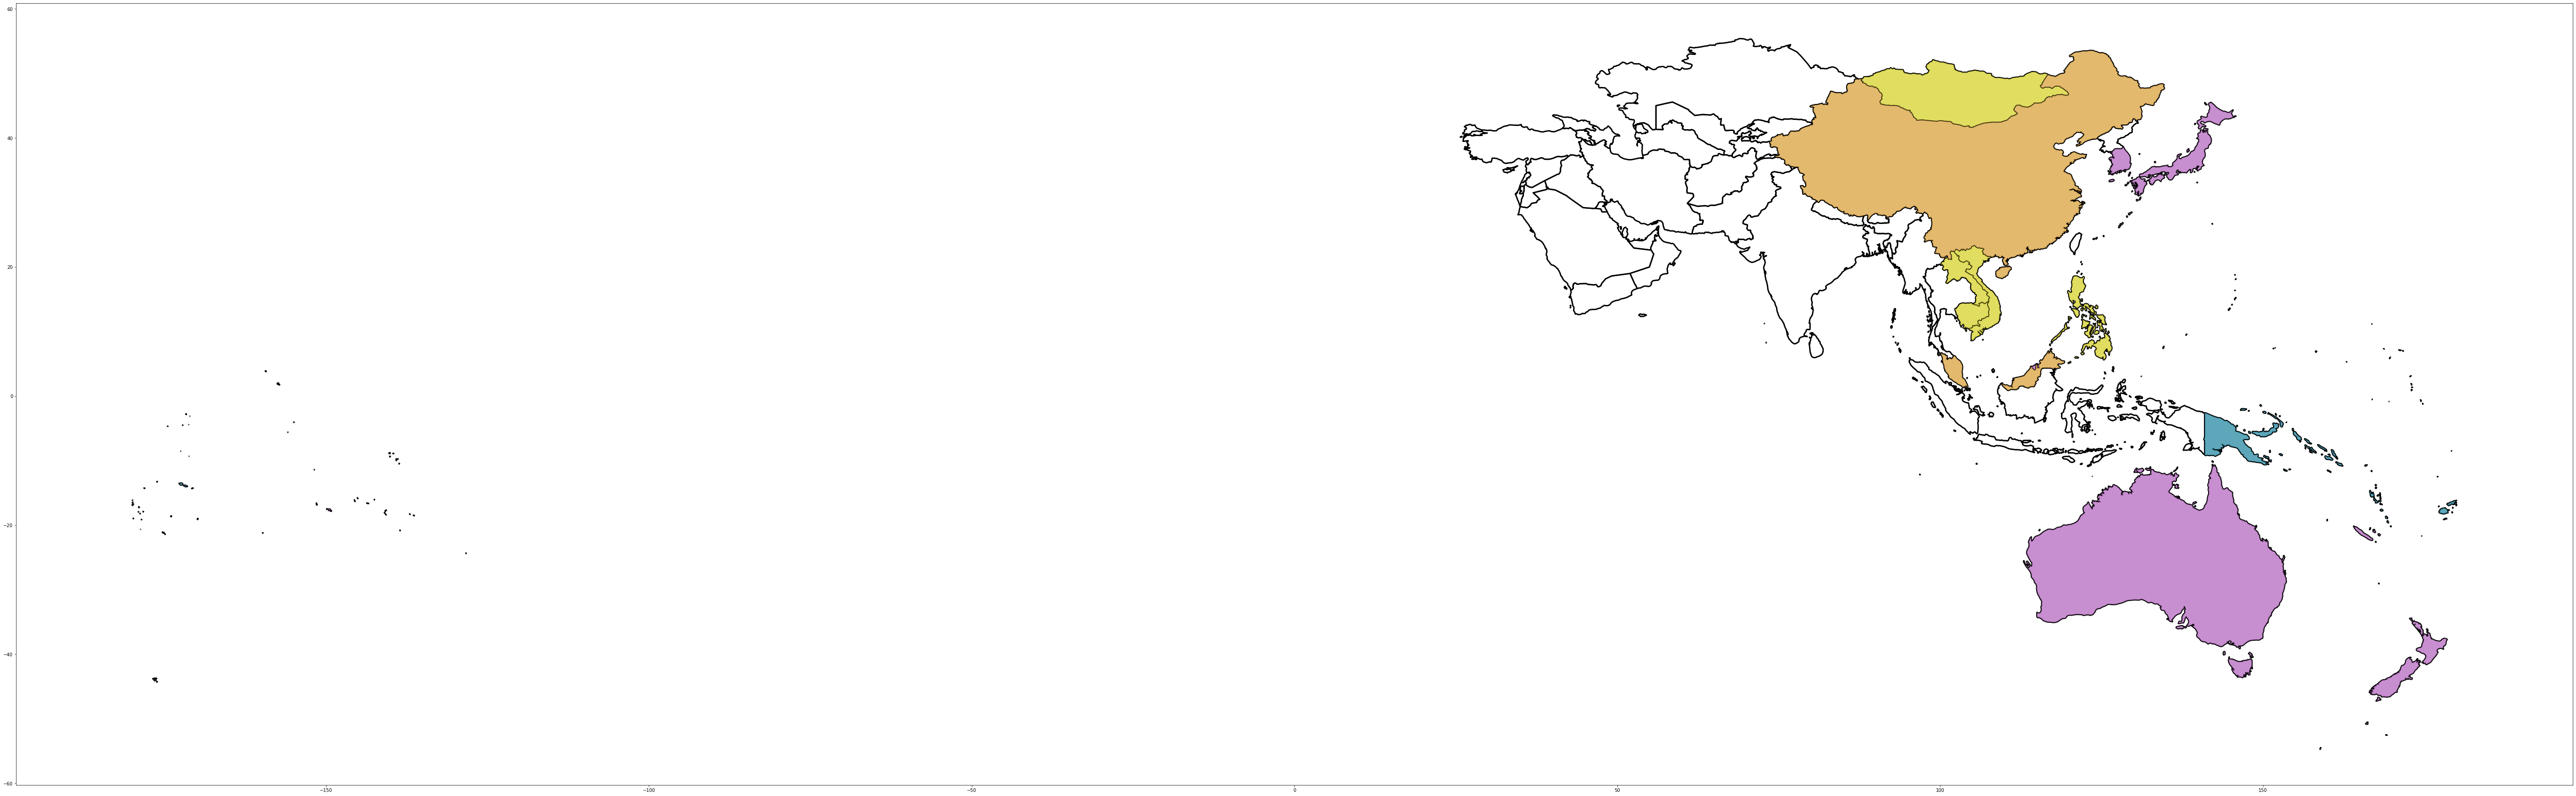

In [36]:
# https://stackoverflow.com/questions/65749316/how-to-plot-maps-with-pythons-matplotlib-so-that-small-island-states-are-includ
# download world data and define continents
use_res = '50m'  # medium resolution of (10m, 50m, 110m)
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(use_res, category, name)

# read the shapefile using geopandas
df = gpd.read_file(shpfilename)

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = df
print(world)
asia = world.query('CONTINENT == "Asia"')
oceania = world.query('CONTINENT == "Oceania"')

# contruct region and centre over asia
region = asia.overlay(oceania, how='union')
ax = region.plot()
region.plot(ax=ax,ec="black",linewidth=3)

# or plot Africa continent
ax2 = region.plot(figsize=(100,100), color='white',ec="black",linewidth=3)

# list countries
hics = ['Australia', 'Brunei', 'Cook Is.', 'Fr. Polynesia', 'Guam', 'Macao', 'Nauru', 'New Caledonia',
	'New Zealand','N. Mariana Is.','Japan','Palau','Pitcairn Is.','South Korea','Singapore']

pis = ['Fiji','Kiribati','Marshall Is.','Micronesia','Niue','Papua New Guinea','Solomon Is.','Samoa','Tuvalu','Vanuatu','Wallis and Futuna Is.']
# tokelao doesn't exist in dataset
ma = ['Cambodia','Laos','Mongolia','Philippines','Vietnam']

umic = ['China','Malaysia','Hong Kong']

wpr = ['American Samoa','Tonga']

# then plot some countries on top
for country in hics:
	print(country)
	plotCountryPatch(ax2, country, '#BF7BC8')

for country in pis:
	print(country)
	plotCountryPatch(ax2, country, '#4298AF')

for country in ma:
	print(country)
	plotCountryPatch(ax2, country, '#DCD745')

for country in umic:
	print(country)
	plotCountryPatch(ax2, country, '#DFAD55')

for country in wpr:
	print(country)
	plotCountryPatch(ax2, country, '#D0D0D0')


# new_region = shift_geom(90, region, False)
# hics.plot(ax=ax,color='#3c66a6')

# _ = shift_geom(-90, new_rus, True)

plt.savefig('heat_country_plot.png',transparent=True)


In [27]:
# print(list(world.columns))


nami = world[world.NAME == 'Japan']
namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
namig0 = nami.centroid

print(namig0)

lon = namig0.x
print(lon)

135    POINT (138.03090 37.59230)
dtype: geometry
135    138.030896
dtype: float64


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [21]:
for country in world.NAME:
    print(country)

Zimbabwe
Zambia
Yemen
Vietnam
Venezuela
Vatican
Vanuatu
Uzbekistan
Uruguay
Micronesia
Marshall Is.
N. Mariana Is.
U.S. Virgin Is.
Guam
American Samoa
Puerto Rico
United States of America
S. Geo. and the Is.
Br. Indian Ocean Ter.
Saint Helena
Pitcairn Is.
Anguilla
Falkland Is.
Cayman Is.
Bermuda
British Virgin Is.
Turks and Caicos Is.
Montserrat
Jersey
Guernsey
Isle of Man
United Kingdom
United Arab Emirates
Ukraine
Uganda
Turkmenistan
Turkey
Tunisia
Trinidad and Tobago
Tonga
Togo
Timor-Leste
Thailand
Tanzania
Tajikistan
Taiwan
Syria
Switzerland
Sweden
eSwatini
Suriname
S. Sudan
Sudan
Sri Lanka
Spain
South Korea
South Africa
Somalia
Somaliland
Solomon Is.
Slovakia
Slovenia
Singapore
Sierra Leone
Seychelles
Serbia
Senegal
Saudi Arabia
São Tomé and Principe
San Marino
Samoa
St. Vin. and Gren.
Saint Lucia
St. Kitts and Nevis
Rwanda
Russia
Romania
Qatar
Portugal
Poland
Philippines
Peru
Paraguay
Papua New Guinea
Panama
Palau
Pakistan
Oman
Norway
North Korea
Nigeria
Niger
Nicaragua
New Zealan